In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# READING DATASET

In [95]:
df=pd.read_csv('/Netflix Dataset.csv')
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7282 non-null   object        
 6   Release_Date  7779 non-null   object        
 7   Rating        7782 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
 11  N_Date        7779 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(11)
memory usage: 730.3+ KB


In [ ]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'N_Date'],
      dtype='object')

In [ ]:
df.dtypes

,0
Show_Id,object
Category,object
Title,object
Director,object
Cast,object
Country,object
Release_Date,object
Rating,object
Duration,object
Type,object


# SHOWING DUPLIATE VALUES

In [ ]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_Date
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...,2019-04-05
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...,2020-09-04


# DROP DUPLICATES VALUE

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_Date


# FOR CHECKING NULL VALUES

In [ ]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


# FOR "HOUSE OF CARDS" WHAT IS THE SHOW ID AND WHO IS THE DIRECTOR ?

In [ ]:
# FOR "HOUSE OF CARDS" WHAT IS THE SHOW ID AND WHO IS THE DIRECTOR ?
df[df['Title'].str.contains('House of Cards')][['Show_Id','Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


In [ ]:
df[df['Title']=='House of Cards'][["Show_Id","Director"]]       #  To show all records of a particular item in any column

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


# Q.2. In which year highest number of the TV Shows & Movies were released ? Show with Bar Graph.

# to_datetime


In [60]:
df["N_Date"]=pd.to_datetime(df["Release_Date"],format="mixed")            # pd.to_datetime--- Pandas ka function jo string dates ko datetime object me convert karta hai
df.head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_Date
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019-04-01
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017-12-15


In [61]:
df["N_Date"].dt.year.value_counts().head(10)

,count
N_Date,
2019.0,2154
2020.0,2010
2018.0,1685
2017.0,1225
2016.0,443
2021.0,117
2015.0,88
2014.0,25
2011.0,13


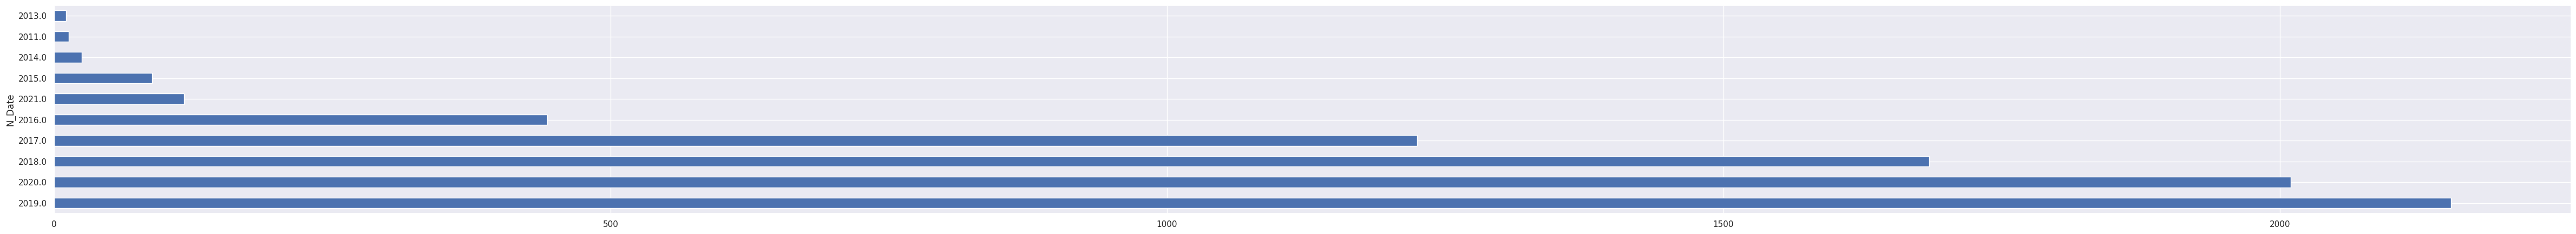

In [62]:
df["N_Date"].dt.year.value_counts().head(10).plot(kind='barh');


In [63]:
df["Category"].value_counts()


,count
Category,
Movie,5379
TV Show,2410


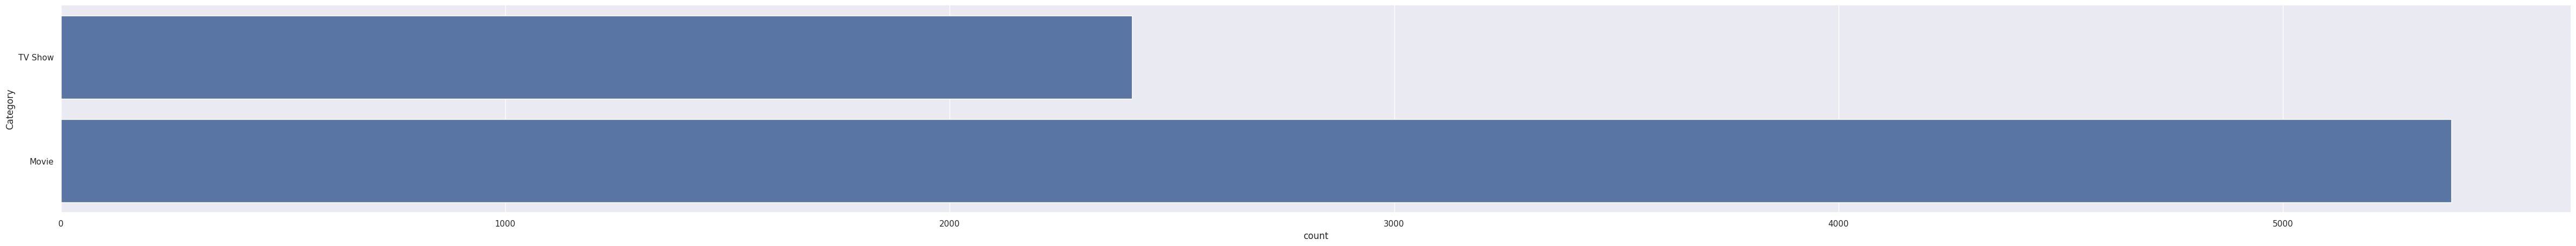

In [64]:
sns.countplot(df["Category"]);
sns.set(rc={'figure.figsize':(60,5)})

# SHOW ALL THE MOVIES THAT RELEASE IN 2000

In [65]:
df['Year'] = df['N_Date'].dt.year
df[ (df['Category'] == 'Movie') & (df['Year']==2000) ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_Date,Year


In [66]:
df[ (df['Category'] == 'Movie') & (df['Year']==2020) ].head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_Date,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01,2020.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020.0
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020-09-08,2020.0
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020-07-01,2020.0


#Show only the Titles of all TV Shows that were released in India only.

In [72]:
df[(df['Category']=='TV Show') & (df['Country']=='India')][['Title']].sample(6)


,Title
1691,Delhi Crime
881,Bhaage Re Mann
1463,College Romance
6037,Th Eena Meena Deeka Chase Comedy Show
1622,Darr Sabko Lagta Hai
132,7 (Seven)


# Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [82]:
df[df['Director']=='Raúl Campos, Jan Suter'].shape

(18, 13)

In [86]:
df['Director'].value_counts().head(10).reset_index()

,Director,count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Martin Scorsese,12
5,Youssef Chahine,12
6,Jay Chapman,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Hakan Algül,8


# Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [93]:
df[(df['Category']=='Movie') & (df['Type']=='Comedies') | (df['Country']=='United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_Date,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01,2019.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01,2017.0
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,2019.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18,2020.0
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31,2017.0


# In how many movies/shows, Tom Cruise was cast ?

In [96]:
df["Cast"].fillna("0",inplace=True)

/tmp/ipython-input-592710870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cast"].fillna("0",inplace=True)


In [ ]:
df[df["Cast"].str.contains("Tom Cruise", na=False)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


# What are the different Ratings defined by Netflix ?

In [ ]:
df["Rating"].nunique()           # kitne alag-alag (unique) values hain, ye count karna.

15

In [ ]:
df['Rating'].unique()           # returns an array of all unique values in that column.

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', '0',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

# How many Movies got the 'TV-14' rating, in Canada ?

In [107]:
df.loc[
    (df["Category"]=="Movie") & (df["Rating"]=="TV-14") & (df["Country"]=="Canada"),
    ["Category", "Rating", "Country"]
]


,Category,Rating,Country
30,Movie,TV-14,Canada
34,Movie,TV-14,Canada
608,Movie,TV-14,Canada
1506,Movie,TV-14,Canada
3713,Movie,TV-14,Canada
3956,Movie,TV-14,Canada
5336,Movie,TV-14,Canada
5393,Movie,TV-14,Canada
6062,Movie,TV-14,Canada
7025,Movie,TV-14,Canada


In [118]:
df["Year"] = pd.to_numeric(df["Release_Date"], errors='coerce').astype('Int64')
# Agar koi value number me convert nahi ho sakti, to usse NaN bana do.
# Matlab, error generate nahi hoga, bas invalid values ko NaN me replace kar diya jayega.

In [122]:
df[(df["Category"]=="TV Show") & (df["Rating"]=="R") & (df["Year"]>2018)].shape
# Count the number of Rows and Columns after filtering the matching condition in the DataFrame

(0, 12)